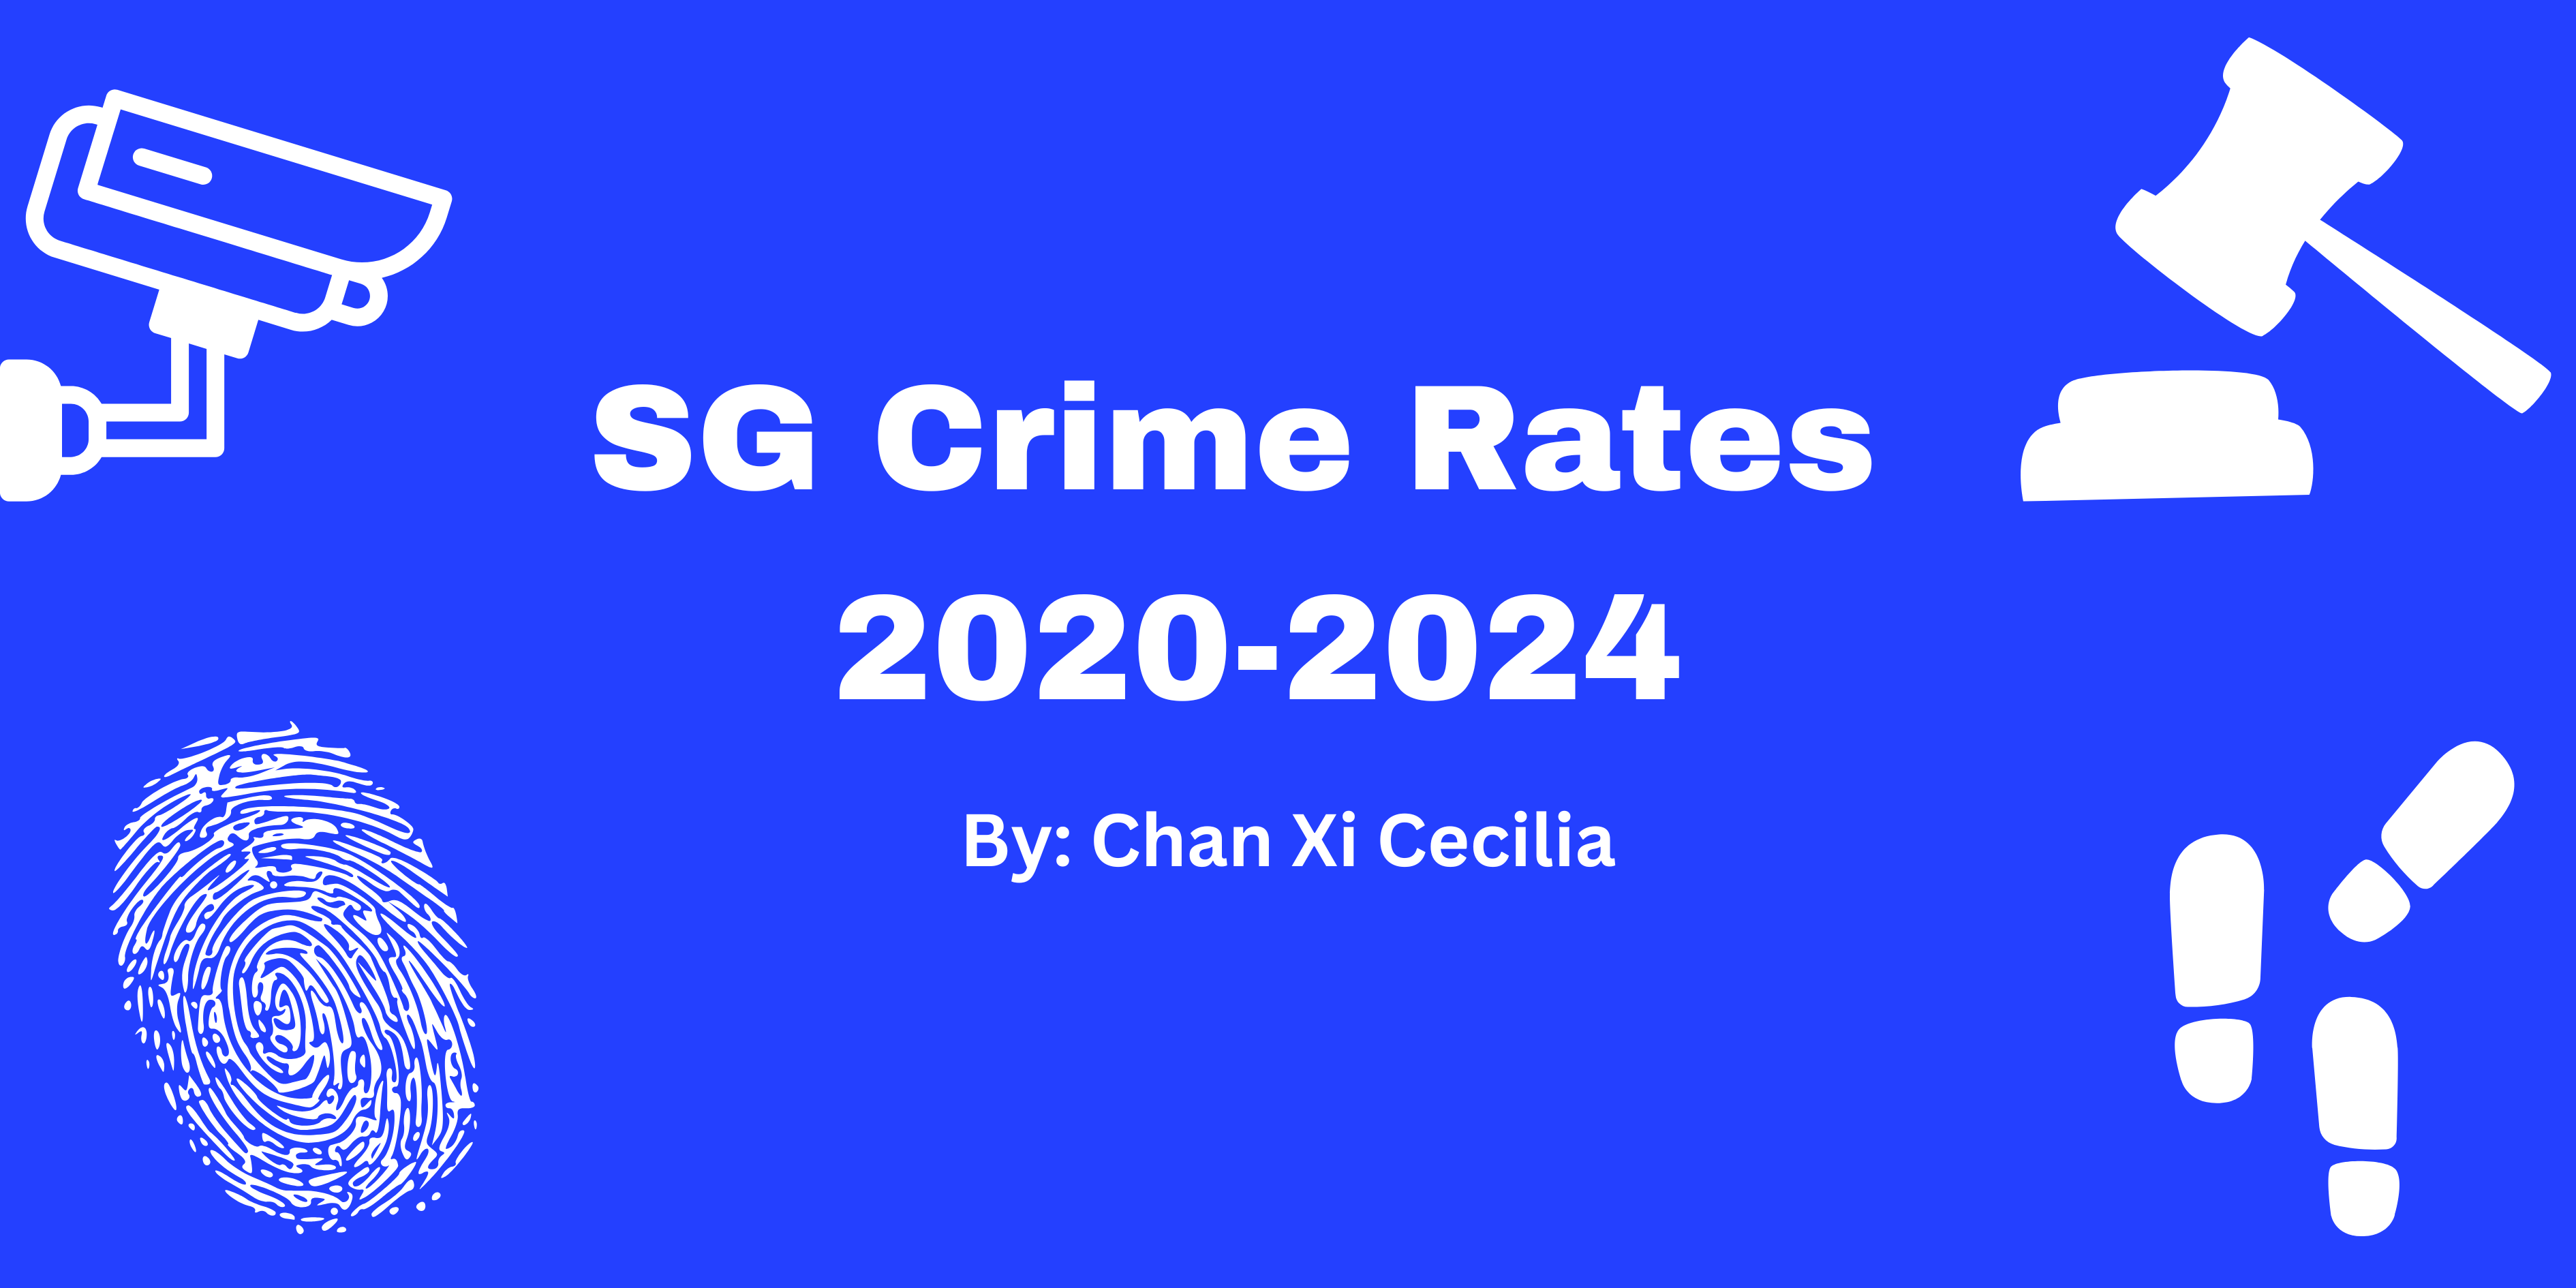

# Background
'Low Crime Doesn't Mean No Crime' A phrase that is heard a lot in Singapore.

It is a known fact that Singapore has one of the lowest crime rates in the world, to the point where we are often called a safe country. However, within the community, there is still multiple crimes that are occuring within the country.

# Aim of the project
The aim of this project is to look at the crime rates of differnet crimes that occur in Singapore from 2020 - 2024 and see how certain crimes have evolved over time through plots

# Dataset:
Source: SingStat

Link: https://tablebuilder.singstat.gov.sg/table/TS/M891481

Dataset: Crime Cases Recorded

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [21]:
#read the csv file
df = pd.read_csv('SG Crimerate Data 2020-2024.csv')

In [22]:
df.head()

,Data Series,2024,2023,2022,2021,2020
0,Physical Crime Cases Recorded (Number Of Cases...,19969,19966,20193,19343,19498
1,Crimes Against Persons (Number Of Cases Reco...,4646,4673,4869,na,na
2,Violent / Serious Property Crimes (Number Of...,74,63,60,na,na
3,Housebreaking And Related Crimes (Number Of ...,176,191,163,na,na
4,Theft And Related Crimes (Number Of Cases Re...,8264,8572,7878,na,na


# Data Pre-Processing & Transformation


In [23]:
#convert na to NaN
df = df.replace(["na", "NA", "Na", "N.A.", "-"], np.nan)

In [24]:
# split metric + unit
def split_metric_unit(text):
    text = str(text).strip()
    m = re.match(r"^(.*)\s+\((.*)\)\s*$", text)
    if m:
        return pd.Series([m.group(1).strip(), m.group(2).strip()])
    return pd.Series([text, np.nan])

df[["metric", "unit"]] = df["Data Series"].apply(split_metric_unit)

In [25]:
# Converting dataset from wide to long format
year_cols = [c for c in df.columns if c.isdigit()]
df_long = df.melt(
    id_vars=["metric", "unit"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

# Convert 'year' to datetime objects (assuming the start of the year)
# The var_name "year" in melt creates string years like "2024".
# We need to explicitly convert these strings to datetime objects.
df_long["year"] = pd.to_datetime(df_long["year"], format='%Y')
df_long["value"] = pd.to_numeric(df_long["value"], errors="coerce")

df_long = df_long.sort_values(["unit", "metric", "year"]).reset_index(drop=True)

print(df_long.head())

              metric                      unit       year   value
0  Commercial Crimes  Number Of Cases Recorded 2020-01-01     NaN
1  Commercial Crimes  Number Of Cases Recorded 2021-01-01     NaN
2  Commercial Crimes  Number Of Cases Recorded 2022-01-01  3260.0
3  Commercial Crimes  Number Of Cases Recorded 2023-01-01  2921.0
4  Commercial Crimes  Number Of Cases Recorded 2024-01-01  3219.0


In [26]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   metric  90 non-null     object        
 1   unit    90 non-null     object        
 2   year    90 non-null     datetime64[ns]
 3   value   66 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.9+ KB


In [27]:
df_long.head(10)

,metric,unit,year,value
0,Commercial Crimes,Number Of Cases Recorded,2020-01-01,NaN
1,Commercial Crimes,Number Of Cases Recorded,2021-01-01,NaN
2,Commercial Crimes,Number Of Cases Recorded,2022-01-01,3260.0
3,Commercial Crimes,Number Of Cases Recorded,2023-01-01,2921.0
4,Commercial Crimes,Number Of Cases Recorded,2024-01-01,3219.0
5,Crimes Against Persons,Number Of Cases Recorded,2020-01-01,NaN
6,Crimes Against Persons,Number Of Cases Recorded,2021-01-01,NaN
7,Crimes Against Persons,Number Of Cases Recorded,2022-01-01,4869.0
8,Crimes Against Persons,Number Of Cases Recorded,2023-01-01,4673.0
9,Crimes Against Persons,Number Of Cases Recorded,2024-01-01,4646.0


In [28]:
df_long.duplicated().sum()

np.int64(0)

There is no duplicated values

In [29]:
df_long.head(15)

,metric,unit,year,value
0,Commercial Crimes,Number Of Cases Recorded,2020-01-01,NaN
1,Commercial Crimes,Number Of Cases Recorded,2021-01-01,NaN
2,Commercial Crimes,Number Of Cases Recorded,2022-01-01,3260.0
3,Commercial Crimes,Number Of Cases Recorded,2023-01-01,2921.0
4,Commercial Crimes,Number Of Cases Recorded,2024-01-01,3219.0
5,Crimes Against Persons,Number Of Cases Recorded,2020-01-01,NaN
6,Crimes Against Persons,Number Of Cases Recorded,2021-01-01,NaN
7,Crimes Against Persons,Number Of Cases Recorded,2022-01-01,4869.0
8,Crimes Against Persons,Number Of Cases Recorded,2023-01-01,4673.0
9,Crimes Against Persons,Number Of Cases Recorded,2024-01-01,4646.0


In [30]:
#Remove unecessary records
totals_to_remove = ["Total Physical Crime", "Total Social Crime", "Total Crime"]
df_long = df_long[~df_long["metric"].isin(totals_to_remove)]

In [31]:
#Split the DataFrame between cases & rate per 100,000 population
df_cases = df_long[df_long["unit"]=="Number Of Cases Recorded"].copy()
df_rates = df_long[df_long["unit"]=="Per 100,000 Population"].copy()

In [32]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   metric  45 non-null     object        
 1   unit    45 non-null     object        
 2   year    45 non-null     datetime64[ns]
 3   value   33 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.8+ KB


In [33]:
df_cases.head(10)

,metric,unit,year,value
0,Commercial Crimes,Number Of Cases Recorded,2020-01-01,NaN
1,Commercial Crimes,Number Of Cases Recorded,2021-01-01,NaN
2,Commercial Crimes,Number Of Cases Recorded,2022-01-01,3260.0
3,Commercial Crimes,Number Of Cases Recorded,2023-01-01,2921.0
4,Commercial Crimes,Number Of Cases Recorded,2024-01-01,3219.0
5,Crimes Against Persons,Number Of Cases Recorded,2020-01-01,NaN
6,Crimes Against Persons,Number Of Cases Recorded,2021-01-01,NaN
7,Crimes Against Persons,Number Of Cases Recorded,2022-01-01,4869.0
8,Crimes Against Persons,Number Of Cases Recorded,2023-01-01,4673.0
9,Crimes Against Persons,Number Of Cases Recorded,2024-01-01,4646.0


In [34]:
df_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 45 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   metric  45 non-null     object        
 1   unit    45 non-null     object        
 2   year    45 non-null     datetime64[ns]
 3   value   33 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.8+ KB


In [35]:
df_rates.head(10)

,metric,unit,year,value
45,Commercial Crimes,"Per 100,000 Population",2020-01-01,NaN
46,Commercial Crimes,"Per 100,000 Population",2021-01-01,NaN
47,Commercial Crimes,"Per 100,000 Population",2022-01-01,58.0
48,Commercial Crimes,"Per 100,000 Population",2023-01-01,49.0
49,Commercial Crimes,"Per 100,000 Population",2024-01-01,53.0
50,Crimes Against Persons,"Per 100,000 Population",2020-01-01,NaN
51,Crimes Against Persons,"Per 100,000 Population",2021-01-01,NaN
52,Crimes Against Persons,"Per 100,000 Population",2022-01-01,86.0
53,Crimes Against Persons,"Per 100,000 Population",2023-01-01,79.0
54,Crimes Against Persons,"Per 100,000 Population",2024-01-01,77.0


# Data Visualization

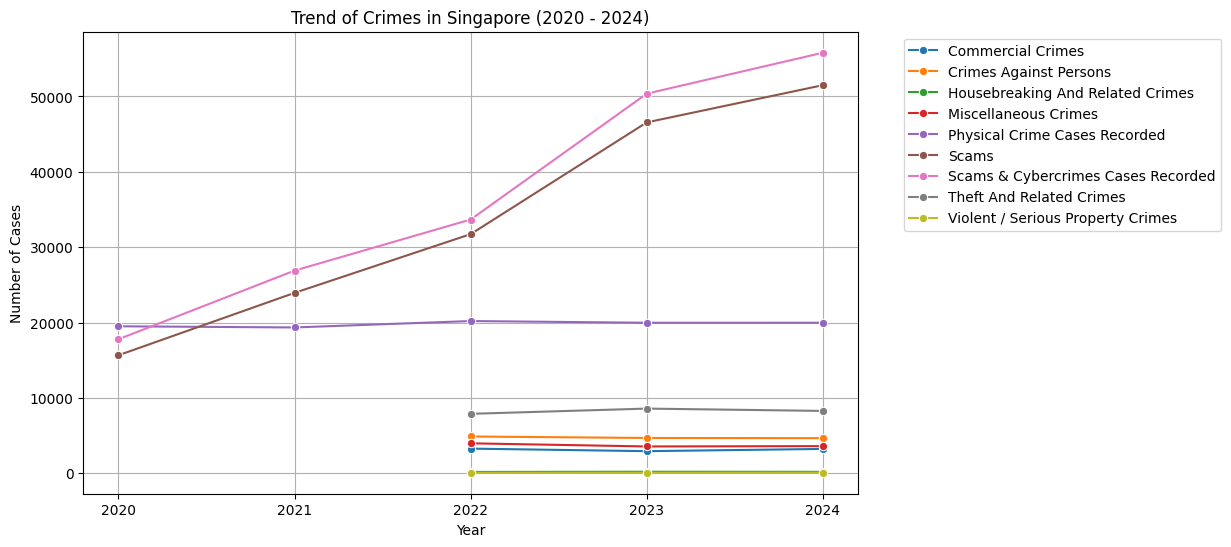

In [36]:
#Trend of crimes
trend = df_cases.groupby("metric")["value"].sum().sort_values(ascending=False).index
df_plot = df_cases[df_cases["metric"].isin(trend)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_plot, x=df_plot["year"].dt.year, y="value", hue="metric", marker="o")
plt.title("Trend of Crimes in Singapore (2020 - 2024)")
plt.ylabel("Number of Cases")
plt.xlabel("Year")
plt.xticks(df_plot["year"].dt.year.unique()) # Explicitly set x-ticks to unique year values
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.show()

## Observations
1. Theft and related crimes, Miscellaneous Crimes, Commercial Crimes and Crimes Against Persons in 2020 - 2021 are not recorded, from 2022 onwards there are some records but they are flat
      *   2020 - 2021 : Covid-19, Circuit Breaker, social distancing and restrictions were implemented which limited people-to-people interactions
      *   2022 onwards, Covid restrictions were released and people-to-people interaction returned
2. Violent/Serious Property Crimes since 2020-2024 has been at a constant zero (nothining happening)

      *   Meaning that in the 5 years there is not occurance of such crimes happening in Singapore.

3. Physical Crimes Cases Recorded throughout those 5 years has been flat with little to no flunctuations


      *   Crimes in this category happen but there hasn't been a sudden increase or decrease in the rate

4. Scams and Scams & Cybercrimes cases recorded has been increasing from 2020 - 2024 with 2024 being the peak


      *   Crimes have evolved to be digital due to today's technological age
      *   Scams over time has become more sophisticated
      *   Records in 2020 - 2021 as with limited people-to-people interactions, the internet has been a place for scammers to scam people


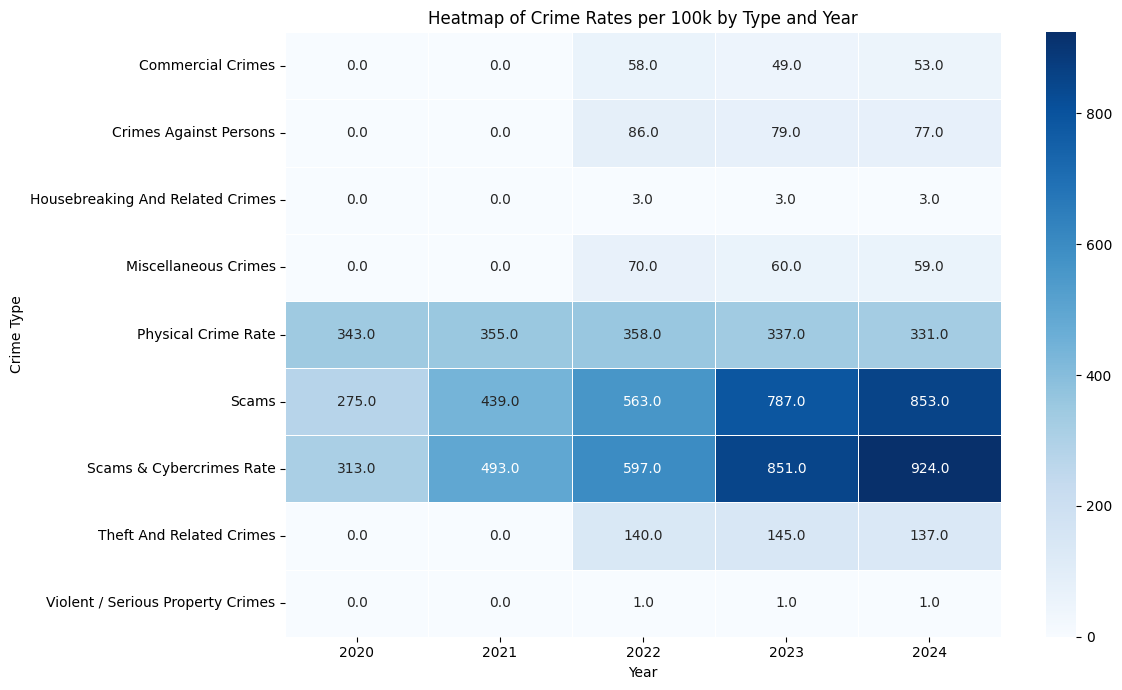

In [37]:
pivot_rates = df_rates.pivot_table(
    index="metric",
    columns=df_rates["year"].dt.year,
    values="value",
    aggfunc="sum"
)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_rates, annot=True, fmt=".1f", linewidths=0.5, cmap="Blues") # Added cmap parameter
plt.title("Heatmap of Crime Rates per 100k by Type and Year")
plt.xlabel("Year")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

## Observations
1. Similar to the above line plot
2. In 2020 & 2021 almost all the crimes but Physical Crime Rate, Scams and Scams & Cybercrimes Rate are at 0 which could be due to Covid-19, Circuit Breake, Social Distancing and other Covid Restrictions. However, there are records from 2022 onwards
3. Physical Crime Rate doesn't have significant changes
4. Scams and Scams & Cybercrime Rate have been increasing since 2020 to 2024 with Scams & Cybercrime Rate and Scams at 924 (darkest colour) and 853 respectivly in 2024

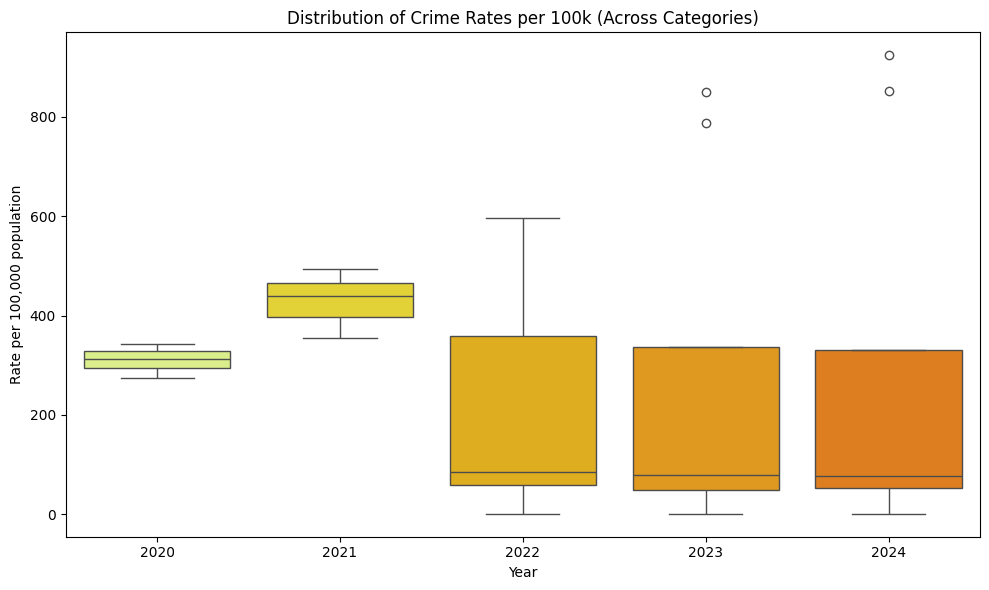

In [38]:
df_r = df_rates.copy()
df_r["year_num"] = df_r["year"].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_r, x="year_num", y="value", hue="year_num", palette='Wistia', legend=False)
plt.title("Distribution of Crime Rates per 100k (Across Categories)")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000 population")
plt.tight_layout()
plt.show()

## Observations
1. 2020 & 2021 shows a smaller variability than 2022, 2023 & 2024


      *  2021 is left/negatively skewed
      *  2020 has a normal distribution


2. 2022, 2023 & 2024 has the same median, have a higher variablity and are right/positively skewed.

3. 2023 & 2024 has some notable outliers

# Conclusion

Despite being a safe country, there are still crimes happening in Singapore. In addition, as time went on and technology continues to evolve, crimes have become more technology-involved with scams and cybercrimes and over the last couple of years, it has been on the rise

Hence, we should continue to be vigilant whether its on the phyisical world or online, we should be careful of our surroundings and be weary of any suspicious links, messages, emails and calls.